# Linear Regression and Core Python Libraries for Data Analysis and Scientific Computing

This task is about linear regression. Using the example of predicting a person's height by their weight, we will see what mathematics is behind this.

## Task 1. Primary data analysis with Pandas

In this task, we will use the data [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights) of height and weight of 25 thousand teenagers.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('D:\Python\weights_heights.csv', index_col='Index')

Most often, the first thing to do after reading data is to look at the first few records. This way you can catch data reading errors (for example, if instead of 10 columns you get one with 9 semicolons in the name). It also allows you to get acquainted with the data, at least to look at the features and their nature (quantitative, categorical, etc.).

**-** Let's build a histogram of teenagers' height distribution from *data* sample. We use the *plot* method for DataFrame *data* with arguments *y='Height'* (this is the feature whose distribution we are building)

<AxesSubplot:title={'center':'Height (inch.) distribution'}, ylabel='Frequency'>

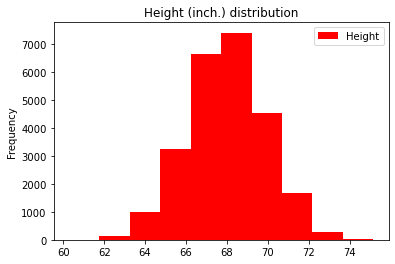

In [3]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')

In [6]:
data.head(n=5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


<AxesSubplot:title={'center':'Weight (lbs.) distribution'}, ylabel='Frequency'>

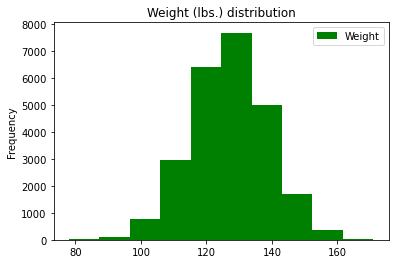

In [5]:
data.plot(y='Weight', kind='hist', 
           color='green',  title='Weight (lbs.) distribution')

One of the effective methods of primary data analysis is the display of pairwise dependencies of features. $m \times m$ graphs are created (*m* - number of features), where feature distribution histograms are drawn along the diagonal, and scatter plots of the dependences of two features are drawn outside the diagonal. This can be done using the $scatter\_matrix$ method of the Pandas Data Frame or *pairplot* of the Seaborn library.

To illustrate this method, it is more interesting to add a third feature. Create a trait *Body mass index* ([BMI](https://en.wikipedia.org/wiki/Body_mass_index)). To do this, we will use a convenient combination of the *apply* Pandas DataFrame method and Python lambda functions.

In [7]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [8]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

**-** Build a picture that will display pairwise dependencies of features , 'Height', 'Weight' and 'BMI' from each other. Use the *pairplot* method of the Seaborn library.

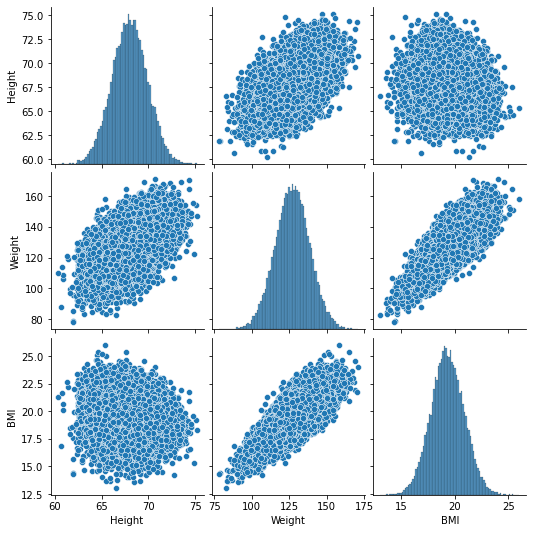

In [15]:
sns.pairplot(data)

Often, in the initial analysis of data, it is necessary to investigate the dependence of some quantitative attribute on a categorical one (say, salary on the employee's gender). This will help "boxes with a mustache" - boxplots of the Seaborn library. Box plot is a compact way to show real feature statistics (mean and quartiles) for different values of a categorical feature. It also helps to track "outliers" - observations in which the value of a given real feature is very different from others.

**-** Create a new attribute *weight_category* in the DataFrame *data* that will have 3 values: 1 - if the weight is less than 120 pounds. (~ 54 kg.), 3 - if the weight is greater than or equal to 150 pounds (~ 68 kg.), 2 - otherwise. Plot a "box with a mustache" (boxplot), demonstrating the relationship between height and weight category. Use the *boxplot* method of the Seaborn library and the *apply* method of Pandas DataFrame. Label the *y* axis with the “Height” label, and the *x* axis with the “Weight category” label.

Проверка:
         Height    Weight        BMI  weight_cat
Index                                           
1      65.78331  112.9925  18.357573           1
2      71.51521  136.4873  18.762577           2
3      69.39874  153.0269  22.338895           3
4      68.21660  142.3354  21.504526           2
5      67.78781  144.2971  22.077581           2
boxplot:


Text(0.5, 0, 'Весовая категория')

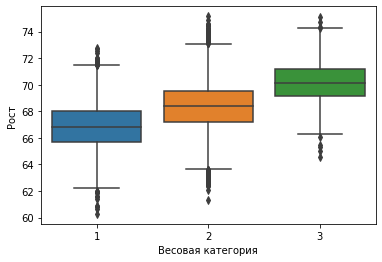

In [28]:
def weight_category(weight):
    if weight<120:
        return (1)
    if weight>=150:
        return (3)
    else:
        return(2)
   
data['weight_cat'] = data['Weight'].apply(weight_category)
# Check:
print('Проверка:')
print (data.head(n=5))
print ('boxplot:')
sns.boxplot(x='weight_cat', y='Height', data=data)
plt.ylabel('Рост')
plt.xlabel('Весовая категория')

**-** Plot a scatterplot of height versus weight using *plot* method on Pandas DataFrame with *kind='scatter'* argument. Sign the picture.

<AxesSubplot:title={'center':'Зависимость роста от веса '}, xlabel='Weight', ylabel='Height'>

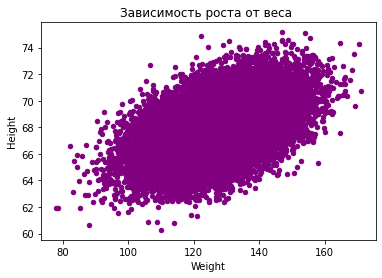

In [33]:
data.plot(x='Weight', y='Height', kind='scatter', 
           color='purple',  title='Зависимость роста от веса ')

## Task 2. Minimizing the quadratic error

In the simplest setting, the problem of predicting the value of a real feature based on other features (the problem of restoring the regression) is solved by minimizing the quadratic error function.

**-** Write a function that, given two parameters $w_0$ and $w_1$, calculates the quadratic error of the approximation of the dependence of the height $y$ on the weight $x$ by a straight line $y = w_0 + w_1 * x$:
$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$
Here $n$ – number of observations in the dataset, $y_i$ и $x_i$ – height and weight of  $i$ person in the dataset. 

In [275]:
def sqrt_error(w0,w1):
     counter=0.
     err=0.  
     for i in range(1,(len(data)+1)):
        err = (data['Height'][i]-(w0+w1*data['Weight'][i]))**2
        err_all=err+counter
        counter=err_all
     return err_all

So, we solve the problem: how to draw a straight line through the cloud of points corresponding to the observations in our data set in the space of features "Height" and "Weight" in such a way as to minimize the functional from step 6. First, let's display at least some straight lines and make sure that they do not convey the dependence of height on weight well.

**-** Draw two straight lines on the graph from item 5 of Task 1 corresponding to the values of the parameters ($w_0, w_1) = (60, 0.05)$ and ($w_0, w_1) = (50, 0.16)$ . Use the *plot* method from *matplotlib.pyplot* as well as the *linspace* method from the NumPy library. Label the axes and graph.

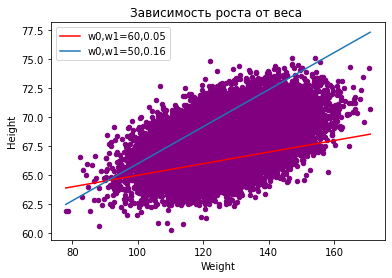

In [327]:
data.plot(x='Weight', y='Height', kind='scatter', 
           color='purple',  title='Зависимость роста от веса ')
x=np.linspace(data['Weight'].min(), data['Weight'].max())
y1 = 60.+0.05*x
plt.plot(x, y1, 'r-', label='w0,w1=60,0.05')
y2 = 50.+0.16*x
plt.plot(x, y2, label='w0,w1=50,0.16')
plt.legend(loc='best')

Minimizing the quadratic error function is a relatively simple task because the function is convex. There are many optimization methods for such a problem. Let's see how the error function depends on one parameter (the slope of the straight line), if the second parameter (the free term) is fixed.

**-** Plot the dependence of the error function calculated in step 6 on the parameter $w_1$ at $w_0$ = 50. Label the axes and the graph.

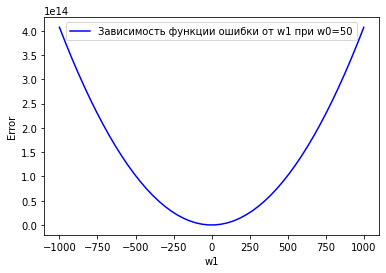

In [277]:
y=sqrt_error(50.,x)
x=np.linspace(-1000,1000)
plt.plot(x, y, 'b-', label='Зависимость функции ошибки от w1 при w0=50')
plt.ylabel('Error')
plt.xlabel('w1')
plt.legend(loc='best')

Now, using the optimization method, we find the "optimal" slope of the straight line approximating the dependence of height on weight, with a fixed coefficient $w_0 = 50$.


**-** Use the *minimize_scalar* method from *scipy.optimize* to find the minimum of the function defined earlier.

In [331]:
from scipy.optimize import minimize_scalar

def sqrt_error2(w):
     counter=0.
     err=0.  
     for i in range(1,(len(data)+1)):
        err = (data['Height'][i]-(50+w*data['Weight'][i]))**2
        err_all=err+counter
        counter=err_all
     return err_all
res_opt=minimize_scalar(sqrt_error2,method='bounded',bounds=(-5,5))
print(res_opt)
w1_opt=res_opt.x


     fun: 79512.21728699487
 message: 'Solution found.'
    nfev: 6
  status: 0
 success: True
       x: 0.1410920372883444


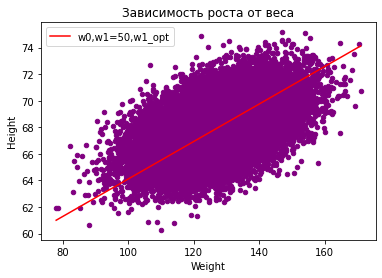

In [335]:
data.plot(x='Weight', y='Height', kind='scatter', 
           color='purple',  title='Зависимость роста от веса')
x=np.linspace(data['Weight'].min(), data['Weight'].max())
y3 = 50.+w1_opt*x
plt.plot(x, y3, 'r-', label='w0,w1=50,w1_opt')
plt.legend(loc='best')

When analyzing multidimensional data, a person often wants to gain an intuitive understanding of the nature of the data through visualization. Alas, if the number of features is more than 3, it is impossible to draw such pictures. In practice, to visualize data in 2D and 3D, 2 or, respectively, 3 main components are distinguished in the data (we will see exactly how this is done later in the course) and display the data on a plane or in a volume. 

Let's see how to draw 3D pictures in Python, using the example of displaying a function $z(x,y) = sin(\sqrt{x^2+y^2})$ for values $x$ и $y$ from [-5,5] with step 0.25.

In [303]:
from mpl_toolkits.mplot3d import Axes3D

**-** Create objects matplotlib.figure.Figure and  matplotlib.axes._subplots.Axes3DSubplot. 

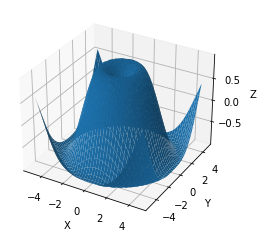

In [305]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis


X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# use *plot_surface*  
#  Axes3DSubplot. 
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

**-** Plot a 3D plot of the dependence of the error function calculated in step 6 on the parameters $w_0$ and $w_1$. Label the $x$ axis with the label "Intercept", the $y$ axis with the label "Slope", and the $z$ axis with the label "Error".

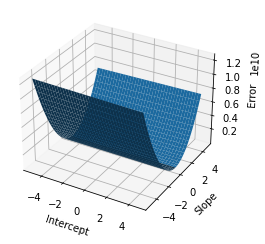

In [309]:
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = sqrt_error(X,Y)
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

**-** Use the *minimize* method from scipy.optimize to find the minimum of the function defined in step 6 for $w_0$ in the range [-100,100] and $w_1$ in the range [-5 , five]. The starting point is ($w_0$, $w_1$) = (0, 0). Use the L-BFGS-B optimization method (the method argument of the minimize method). Draw a straight line on the graph from paragraph 5 of Task 1 corresponding to the found optimal values of the parameters $w_0$ and $w_1$. Label the axes and graph.

In [321]:
def sqrt_error3(w):
     counter=0.
     err=0.  
     for i in range(1,(len(data)+1)):
        err = (data['Height'][i]-(w[0]+w[1]*data['Weight'][i]))**2
        err_all=err+counter
        counter=err_all
     return err_all

x0 = np.array([0,0])
res_opt_2=optimize.minimize(sqrt_error3, x0, method = 'L-BFGS-B', bounds=((-100, 100), (-5, 5)))
print(res_opt_2)

      fun: 67545.28709133144
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00436557, -0.34488039])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 45
      nit: 9
     njev: 15
   status: 0
  success: True
        x: array([57.57188014,  0.08200568])


w0= 57.57188013877858 w1= 0.08200567880874621


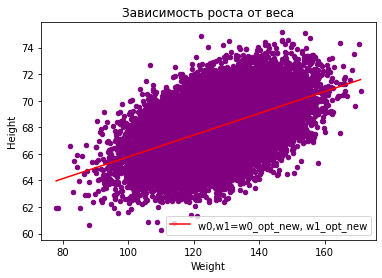

In [336]:
w0_opt_new=res_opt_2.x[0]
w1_opt_new=res_opt_2.x[1]
print('w0=', w0_opt_new, 'w1=', w1_opt_new)

data.plot(x='Weight', y='Height', kind='scatter', 
           color='purple',  title='Зависимость роста от веса')
x=np.linspace(data['Weight'].min(), data['Weight'].max())
y4 = w0_opt_new+w1_opt_new*x
plt.plot(x, y4, 'r-', label='w0,w1=w0_opt_new, w1_opt_new')
plt.legend(loc='best')